In [3]:
import pandas as pd

# Load Customer data
customer_df = pd.read_excel('/Customer.xls')
customer_df.head()

,Customer_ID,First,Last,Age,Country
0,1,Joseph,Rice,43,USA
1,2,Gary,Moore,71,USA
2,3,John,Walker,44,UK
3,4,Eric,Carter,38,UK
4,5,William,Jackson,58,UAE


In [4]:
import json

# Load Shipping data
with open('/Shipping.json') as f:
    shipping_data = json.load(f)
shipping_df = pd.DataFrame(shipping_data)
print(shipping_df.head())


   Shipping_ID     Status  Customer_ID
0            1    Pending          173
1            2    Pending          155
2            3  Delivered          242
3            4    Pending          223
4            5  Delivered           72


In [5]:
# Load Order data
order_df = pd.read_csv('/Order.csv')
print(order_df.head())


   Order_ID      Item  Amount  Customer_ID
0         1  Keyboard     400          139
1         2     Mouse     300          250
2         3   Monitor   12000          239
3         4  Keyboard     400          153
4         5  Mousepad     250          153


We will now transform and aggregate the data to meet the specified requirements.

1. Total amount spent and the country for the Pending delivery status for each country:

In [7]:
# Merge Shipping with Customer to get country information
pending_shipments = shipping_df[shipping_df['Status'] == 'Pending']
pending_with_customer = pending_shipments.merge(customer_df, left_on='Customer_ID', right_on='Customer_ID')

pending_with_customer.head()


,Shipping_ID,Status,Customer_ID,First,Last,Age,Country
0,1,Pending,173,Joseph,Brown,29,UK
1,229,Pending,173,Joseph,Brown,29,UK
2,239,Pending,173,Joseph,Brown,29,UK
3,2,Pending,155,Jamie,Johnson,28,UAE
4,14,Pending,155,Jamie,Johnson,28,UAE


Could not identify pending delivery since there is no common key between shipping id table and orders table

In [10]:
customer_summary = order_df.groupby('Customer_ID').agg(
    total_orders=('Order_ID', 'count'),  # Count of orders
    total_quantity=('Item', 'sum'),  # Sum of quantity of items
    total_amount_spent=('Amount', 'sum')  # Sum of amount spent
).reset_index()

# Display the result
print(customer_summary)

     Customer_ID  total_orders                  total_quantity  \
0              4             1                        Mousepad   
1              5             1                         DDR RAM   
2              8             4   MousepadDDR RAMWebcamMousepad   
3             10             1                        Keyboard   
4             12             1                        Harddisk   
..           ...           ...                             ...   
155          244             1                         Headset   
156          246             1                         Headset   
157          247             3        KeyboardHarddiskMousepad   
158          249             4  HeadsetDDR RAMMousepadMousepad   
159          250             1                           Mouse   

     total_amount_spent  
0                   200  
1                  1500  
2                  2300  
3                   400  
4                  5000  
..                  ...  
155                 900  

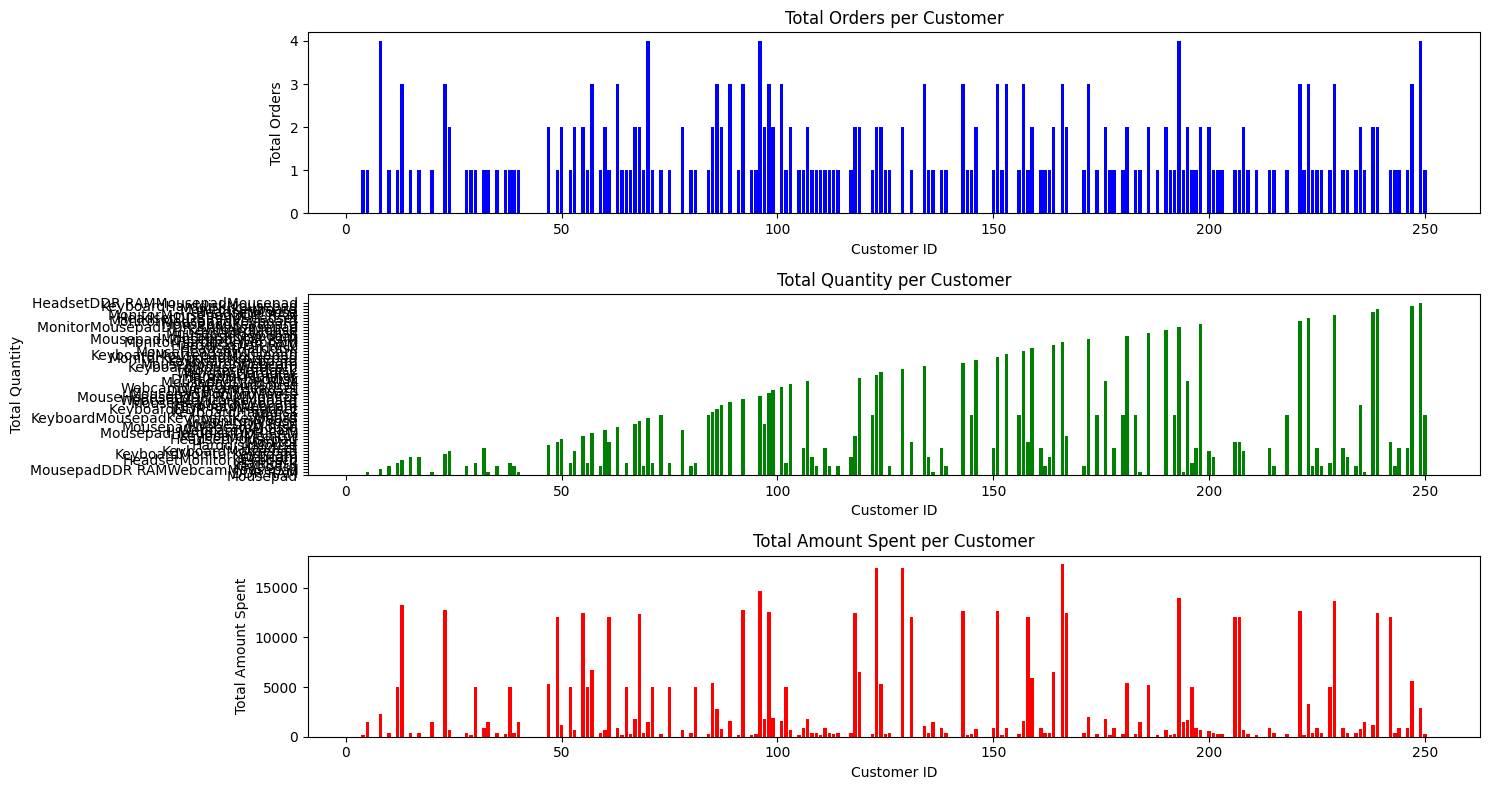

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot 1: Total Orders per Customer
plt.subplot(3, 1, 1)
plt.bar(customer_summary['Customer_ID'], customer_summary['total_orders'], color='blue')
plt.title('Total Orders per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Orders')

# Plot 2: Total Quantity per Customer
plt.subplot(3, 1, 2)
plt.bar(customer_summary['Customer_ID'], customer_summary['total_quantity'], color='green')
plt.title('Total Quantity per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity')

# Plot 3: Total Amount Spent per Customer
plt.subplot(3, 1, 3)
plt.bar(customer_summary['Customer_ID'], customer_summary['total_amount_spent'], color='red')
plt.title('Total Amount Spent per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [15]:
# Merge the order data with customer data to get the country information
merged_data = pd.merge(order_df, customer_df, on='Customer_ID')

# Group by Country and Product, and sum the Quantity for each group
product_sales_by_country = merged_data.groupby(['Country', 'Item']).agg(
    total_quantity=('Item', 'sum')
).reset_index()

# For each country, find the product with the maximum quantity
max_product_by_country = product_sales_by_country.loc[
    product_sales_by_country.groupby('Country')['total_quantity'].idxmax()
]

# Display the result
print(max_product_by_country)

   Country    Item                                     total_quantity
7      UAE  Webcam                     WebcamWebcamWebcamWebcamWebcam
15      UK  Webcam  WebcamWebcamWebcamWebcamWebcamWebcamWebcamWebc...
23     USA  Webcam  WebcamWebcamWebcamWebcamWebcamWebcamWebcamWebc...


In [19]:
import pandas as pd

# Sample data
# Assuming 'age' column exists in customer_df and 'Quantity' column exists in order_df
# Replace these with your actual dataframes and column names

# Step 1: Merge the order data with customer data
merged_data = pd.merge(order_df, customer_df, on='Customer_ID')

# Step 2: Create age categories
merged_data['Age_Category'] = merged_data['Age'].apply(lambda x: 'Less than 30' if x < 30 else '30 or above')

# Step 3: Group by Age_Category and Item, and sum the Quantity
product_sales_by_age = merged_data.groupby(['Age_Category', 'Item']).agg(
    total_quantity=('Item', 'sum')
).reset_index()

# Step 4: For each age category, find the product with the maximum quantity
max_product_by_age = product_sales_by_age.loc[
    product_sales_by_age.groupby('Age_Category')['total_quantity'].idxmax()
]

# Display the result
print(max_product_by_age)



    Age_Category    Item                                     total_quantity
7    30 or above  Webcam  WebcamWebcamWebcamWebcamWebcamWebcamWebcamWebc...
15  Less than 30  Webcam  WebcamWebcamWebcamWebcamWebcamWebcamWebcamWebc...


In [22]:
import pandas as pd

# Sample data
# Assuming 'Country' and 'Sales_Amount' columns exist in merged_data
# Replace these with your actual DataFrame and column names

# Step 1: Aggregate transactions and sales per country
country_stats = merged_data.groupby('Country').agg(
    total_transactions=('Order_ID', 'count'),
    total_sales_amount=('Amount', 'sum')
).reset_index()

# Step 2: Find the country with the minimum number of transactions
min_transactions_country = country_stats.loc[country_stats['total_transactions'].idxmin()]

# Step 3: Find the country with the minimum sales amount
min_sales_country = country_stats.loc[country_stats['total_sales_amount'].idxmin()]

# Display results
print("Country with minimum transactions:")
print(min_transactions_country)

print("\nCountry with minimum sales amount:")
print(min_sales_country)


Country with minimum transactions:
Country                 UAE
total_transactions       40
total_sales_amount    49950
Name: 0, dtype: object

Country with minimum sales amount:
Country                 UAE
total_transactions       40
total_sales_amount    49950
Name: 0, dtype: object


Text(0, 0.5, 'Total Transactions')

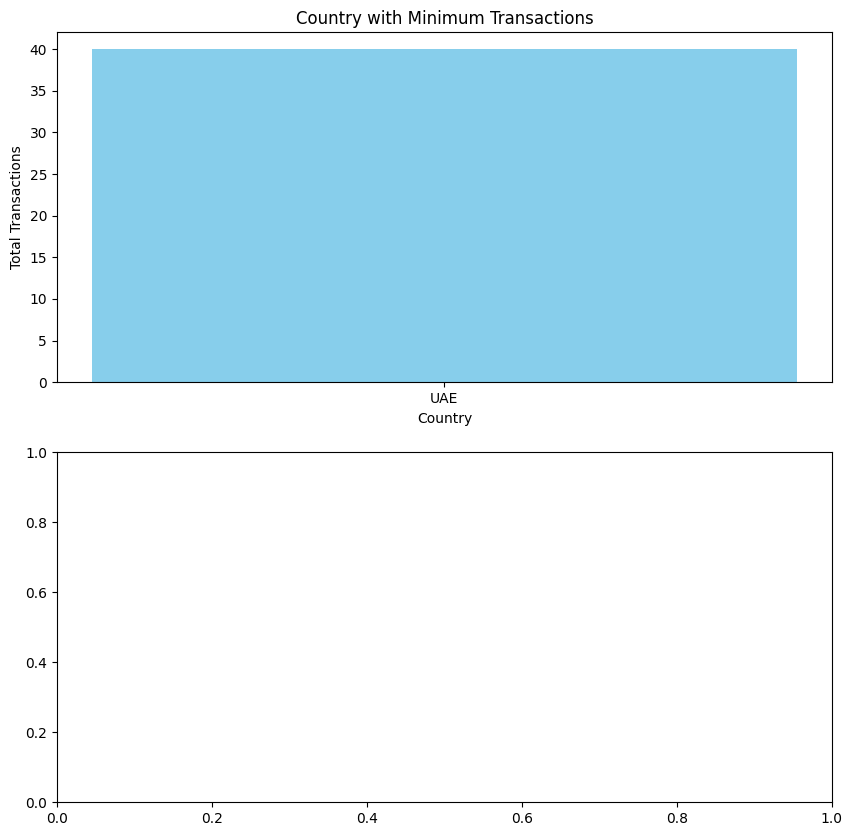

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data preparation (replace with actual data)
# merged_data = pd.merge(order_df, customer_df, on='Customer_ID')
# Assume country_stats is already calculated as shown previously

# Aggregate transactions and sales per country
country_stats = merged_data.groupby('Country').agg(
    total_transactions=('Order_ID', 'count'),
    total_sales_amount=('Amount', 'sum')
).reset_index()

# Find the country with the minimum transactions and sales amount
min_transactions_country = country_stats.loc[country_stats['total_transactions'].idxmin()]
min_sales_country = country_stats.loc[country_stats['total_sales_amount'].idxmin()]

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot for minimum transactions
ax[0].bar(min_transactions_country['Country'], min_transactions_country['total_transactions'], color='skyblue')
ax[0].set_title('Country with Minimum Transactions')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Total Transactions')

# Plot fo


In [25]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [27]:
!git config --global user.name "Farhan Khan"
!git config --global user.email "farhank1221@gmail.com"


In [28]:
!git clone https://github.com/farhank1221/peigroup


Cloning into 'peigroup'...


In [32]:
!cp /content/peigroup.ipynb /content/my-colab-project/


cp: cannot stat '/content/peigroup.ipynb': No such file or directory


In [36]:
!ls /content/peigroup
